In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
# Generate dataset using make_classification function in the sklearn. 
X,y = make_classification(n_samples=10000, n_features=8 ,n_informative = 5,class_sep = 2,random_state = 42)
# Convert it into pandas dataframe.
df = pd.DataFrame(np.c_[X, y])
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0.0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1.0
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0.0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0.0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0.0


In [3]:
# Check duplicate values and missing data.
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

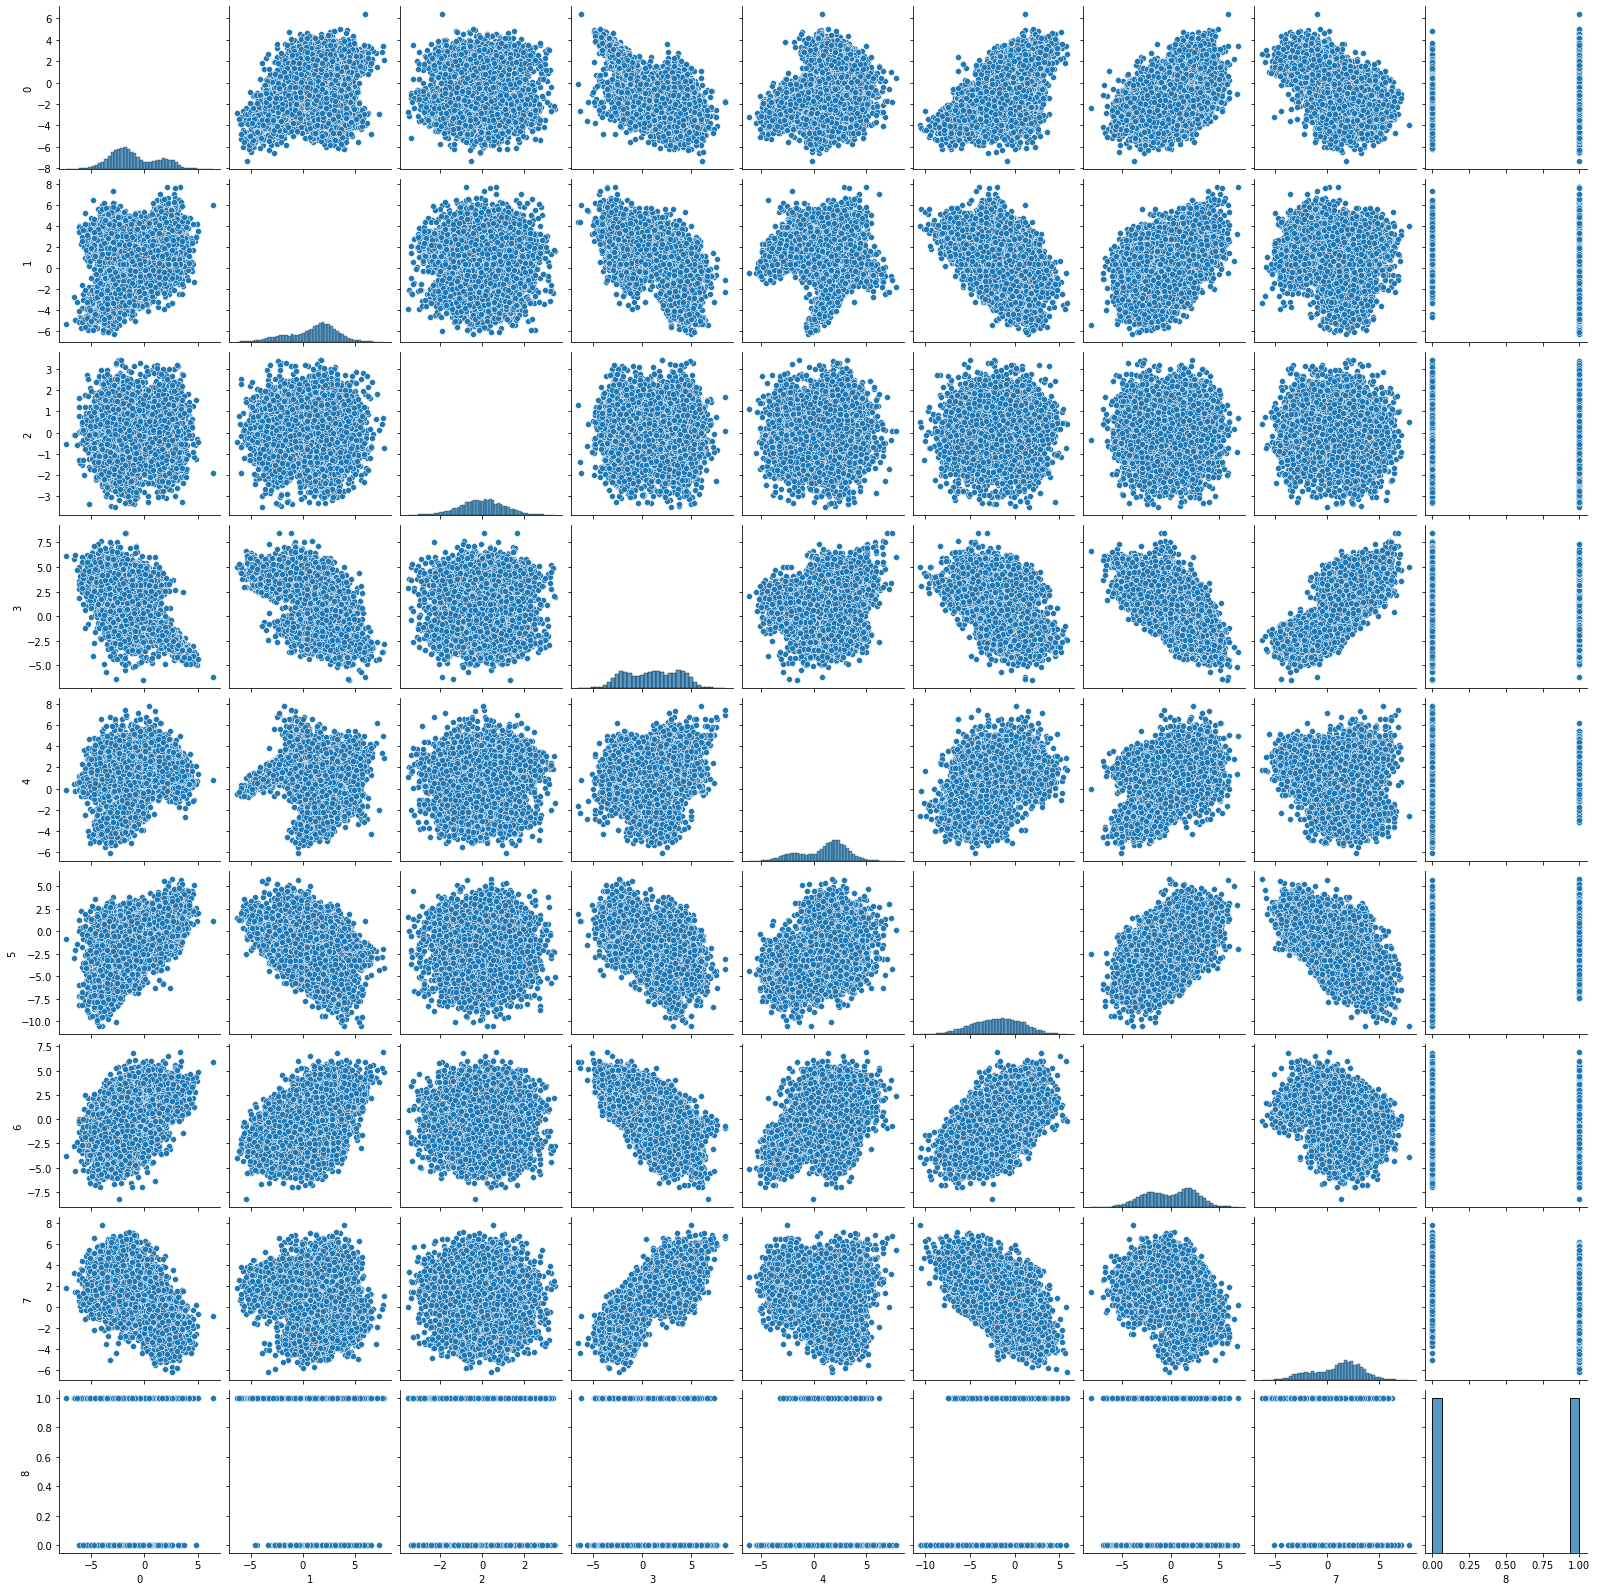

In [4]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(df)

In [5]:
# Draw correlation matrix.
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540,0.465898
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568,-0.444298
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107,0.018144
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458,-0.034356
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576,0.460011
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011,0.560296
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518,0.002034
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000,-0.439571
8,0.465898,-0.444298,0.018144,-0.034356,0.460011,0.560296,0.002034,-0.439571,1.000000


(10000, 9)
(9942, 9)


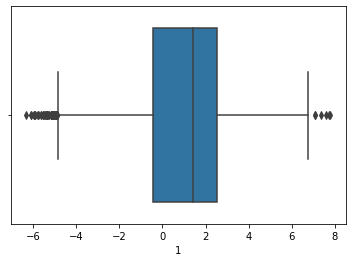

In [6]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
sns.boxplot(x=df[1])
z = np.abs(stats.zscore(df))

print(df.shape)
df = df[(z < 3).all(axis=1)]
print(df.shape)

In [7]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [8]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=7, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9828571428571429
Accuracy of test: 0.9766666666666667


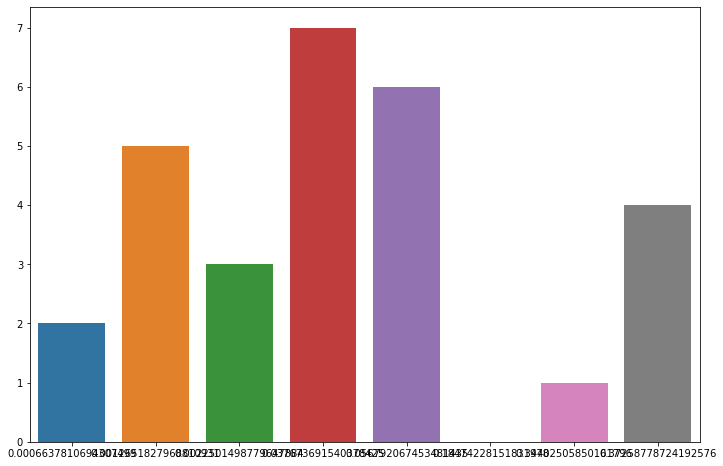

In [9]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
X, y = df.iloc[: , :-1], df.iloc[: , -1]
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1468
           1       0.98      0.97      0.98      1532

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



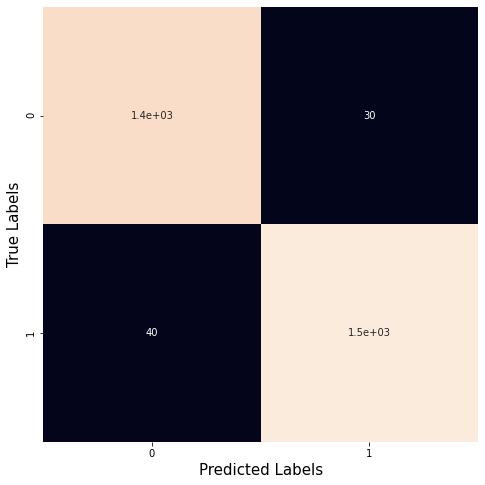

Precision = 0.9766127469197818
Recall = 0.9767271860615676
Accuracy = 0.9766666666666667
F1 Score = 0.9766591042164328


In [10]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_test)
print(classification_report(y_test,pred))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))